In [66]:
'''
1) Hypothesis testing
Question: Do males burn more calories than females on average?
H₀: There is no difference in average calories burned between male and female gym members.
H₁: Males burn more calories on average than females.

'''

'\n1) Hypothesis testing\nQuestion: Do males burn more calories than females on average?\nH₀: There is no difference in average calories burned between male and female gym members.\nH₁: Males burn more calories on average than females.\n\n'

In [67]:
import pandas as pd
df = pd.read_csv("gym_data.csv")
new = df[['Gender', 'Calories_Burned']].dropna()
males = new[new['Gender'] == 'Male']['Calories_Burned']
females = new[new['Gender'] == 'Female']['Calories_Burned']

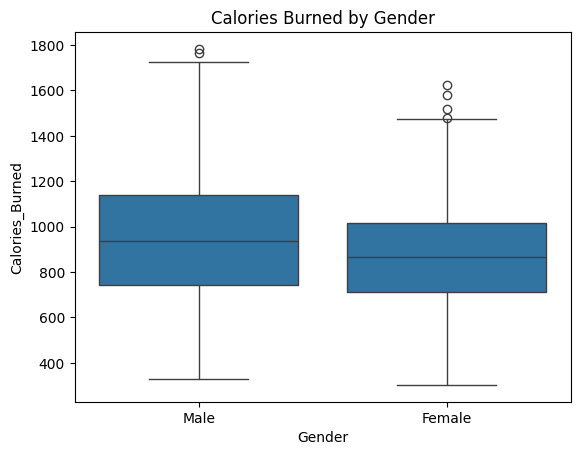

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Calories_Burned', data=df)
plt.title("Calories Burned by Gender")
plt.show()

In [56]:
import scipy.stats as stats

pvalue = stats.ttest_ind(females, males, equal_var=False)
# pvalue=np.float64(2.0102943133909015e-06)

print('female mean cals burned:', females.mean()) 
print('male mean cals burned:', males.mean())
# female mean cals burned: 862.2489177489177
# male mean cals burned: 944.4559686888454

female mean cals burned: 862.2489177489177
male mean cals burned: 944.4559686888454


In [57]:
''' 
Since the p-value is less than/equal to 0.001, we can conclude that there is very strong evidence against the hypothesis that on average, male 
and female gym members burn the same amount of calories based on the observed data. From the sample means, we can see that male gym members burn 
more calories on average.

'''

' \nSince the p-value is less than/equal to 0.001, we can conclude that there is very strong evidence against the hypothesis that on average, male \nand female gym members burn the same amount of calories based on the observed data. From the sample means, we can see that male gym members burn \nmore calories on average.\n\n'

In [58]:
'''
2) Predictive modeling
Question: Can we predict calories burned per session using member characteristics and workout data?
'''

'\n2) Predictive modeling\nQuestion: Can we predict calories burned per session using member characteristics and workout data?\n'

In [59]:
categorical_features = ['Gender','Workout_Type']
numeric_features = ['Age','Weight (kg)','Height (m)','Max_BPM','Avg_BPM', 'Resting_BPM','Session_Duration (hours)','Fat_Percentage', 
                   'Water_Intake (liters)','Workout_Frequency (days/week)','Experience_Level','BMI']
target_name = 'Calories_Burned'

X = df[numerical_features + categorical_features]
y = df[target_name]


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', numerical_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regression", LinearRegression())]
)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


In [61]:
reg

,steps,"[('preprocessor', ...), ('regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [62]:
from sklearn.metrics import r2_score, root_mean_squared_error

print("R² score: %.3f" % reg.score(X_test, y_test))
# score method returns R^2 for regressors by default
# print("R² Score: %.3f" % r2_score(y_test, y_pred)) 

print("RMSE: %.3f" % root_mean_squared_error(y_test, y_pred))

# R² score: 0.981
# RMSE: 37.598

R² score: 0.981
RMSE: 37.598


In [63]:
'''
From the output, the model explains approximately 98.1% of the variance in y_test, the set of true calories burned among gym members. 
The average magnitude of the model's prediction errors is 37.6 calories from the true value.

Thus, the model is highly accurate in its predictive performance. It explains almost all of the variability in calories burned and makes 
predictions that are only about 38 calories off from the true values, making it reliable for estimating calorie expenditure among gym members.
'''

"\nFrom the output, the model explains approximately 98.1% of the variance in y_test, the set of true calories burned among gym members. \nThe average magnitude of the model's prediction errors is 37.6 calories from the true value.\n\nThus, the model is highly accurate in its predictive performance. It explains almost all of the variability in calories burned and makes \npredictions that are only about 38 calories off from the true values, making it reliable for estimating calorie expenditure among gym members.\n"

In [64]:
# Regressed coefficients:
coefficients = reg.named_steps['regression'].coef_
feature_names = reg.named_steps['preprocessor'].get_feature_names_out()

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
print(coef_df.sort_values(by="Coefficient", ascending=False))

                               Feature  Coefficient
6        num__Session_Duration (hours)   714.562075
2                      num__Height (m)   116.086658
12                    cat__Gender_Male    82.971001
4                         num__Avg_BPM     6.310991
11                            num__BMI     3.652855
10               num__Experience_Level     0.862595
5                     num__Resting_BPM     0.327575
3                         num__Max_BPM    -0.013478
9   num__Workout_Frequency (days/week)    -0.185838
7                  num__Fat_Percentage    -0.293522
14          cat__Workout_Type_Strength    -0.616832
13              cat__Workout_Type_HIIT    -0.940913
1                     num__Weight (kg)    -1.042860
8           num__Water_Intake (liters)    -2.496974
0                             num__Age    -3.413318
15              cat__Workout_Type_Yoga    -6.257781


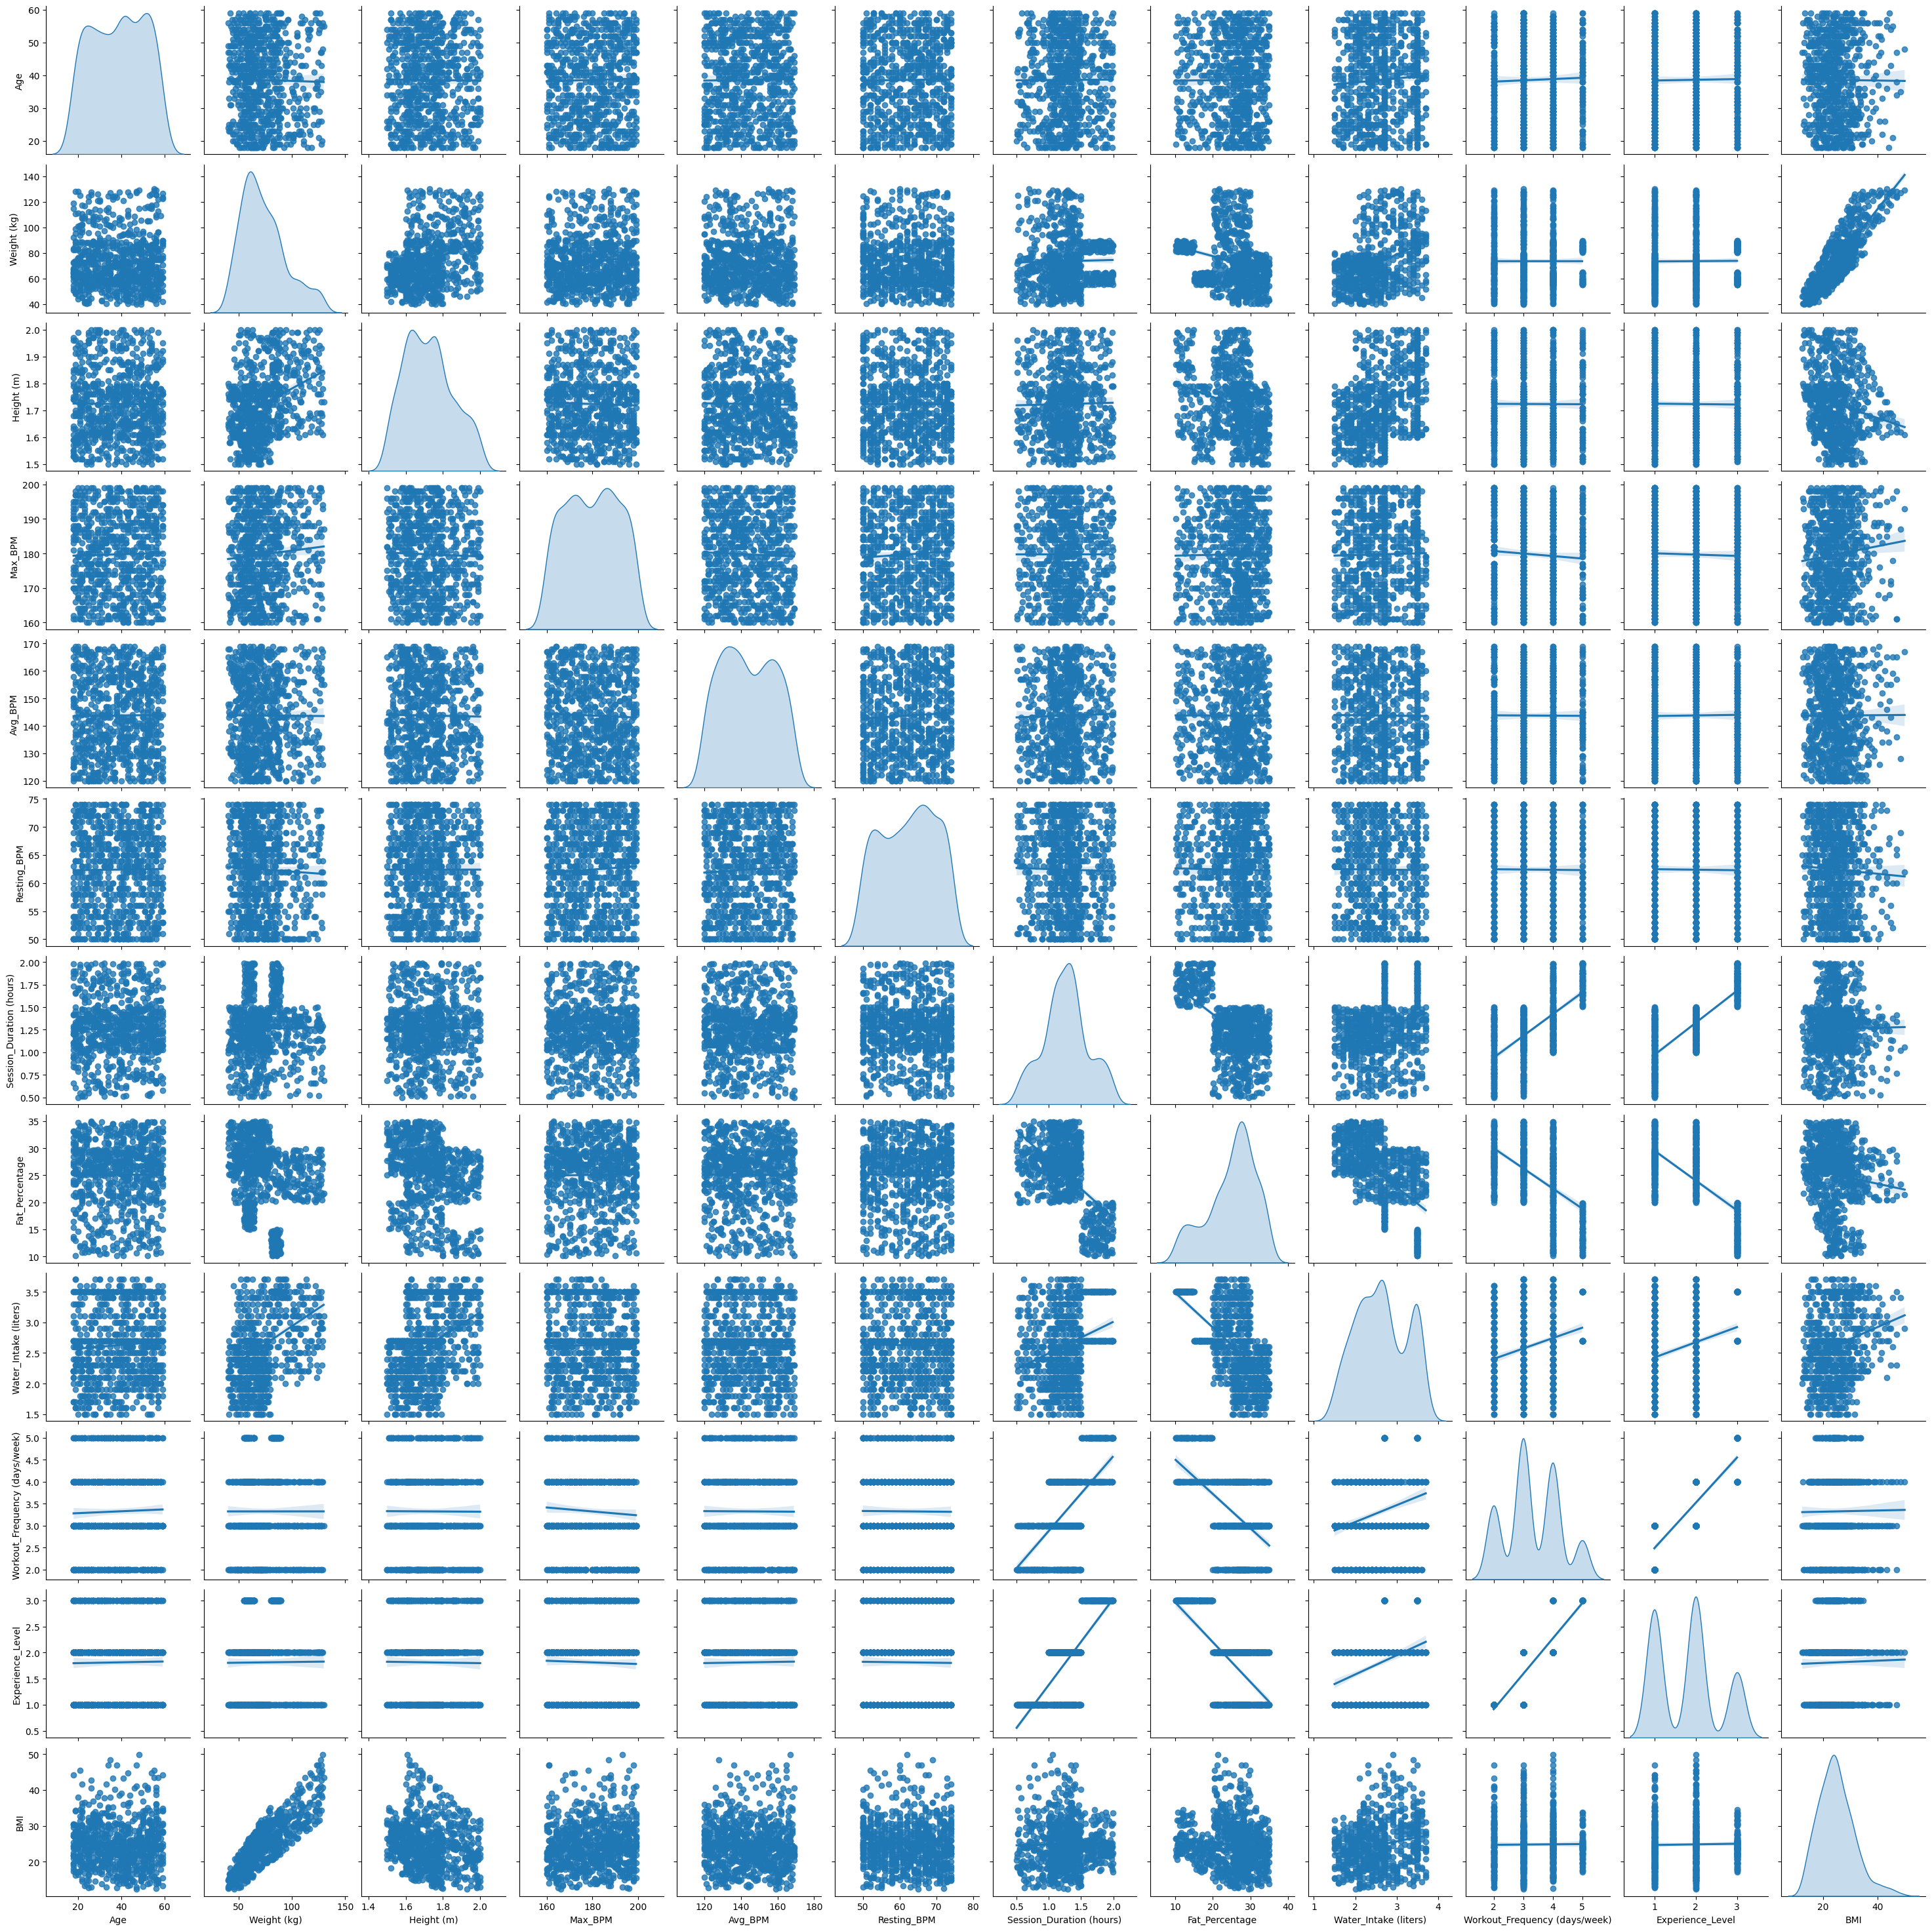

In [69]:
sns.pairplot(X_train.copy(), kind="reg", diag_kind="kde")

In [ ]:
'''

'''